# Imports

In [1]:
import sys, datetime
from qick.asm_v2 import QickSweep1D

sys.path.append("../Libraries") # replace this with your location of the Libraries folder
from resonator_spectroscopy import *

No module named 'visa'
Warning VISA library import failed
Warning serial library import failed.
Could not load Autonics TM4 Driver


# Run experiment

  0%|          | 0/500000 [00:00<?, ?it/s]

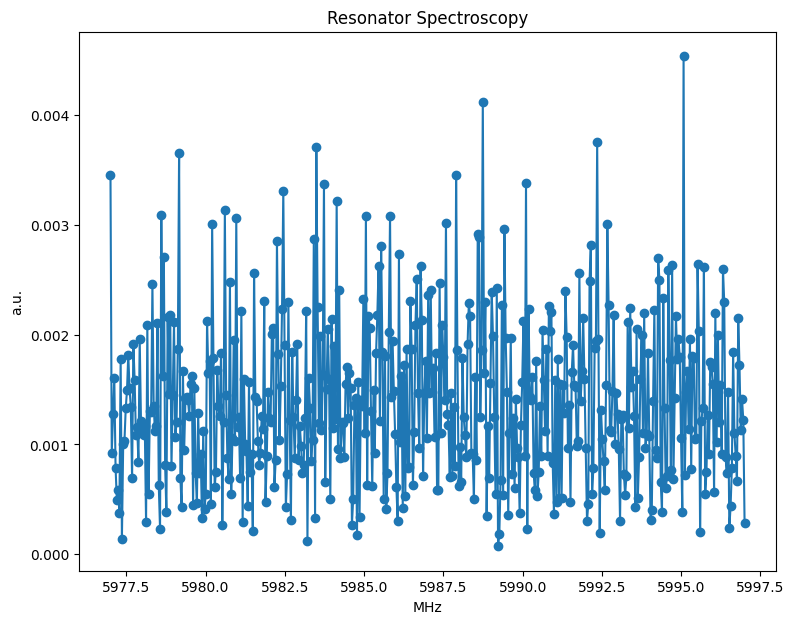

In [2]:
date = str(datetime.datetime.now().strftime('%Y_%m_%d'))
time = str(datetime.datetime.now().strftime('%H;%M;%S'))

datapath = f'G:\\My Drive\\chatot\\data\\resonator_spectroscopy\\{date}\\{time}\\' # replace this with your data location

config_file = f"..\\..\\..\\..\\cfg\\llosta.json" # replace this with your config

meas = resonator_spectroscopy(path=datapath, config_file=config_file)

center = 5987
span = 10
steps = 500

meas.cfg.expt = {
    "n_avg": 1000,
    "pulse_len": 8,
    "phase": 0,
    "gain": 0.03,
    "trig_offset": 0.5,
    "freq": QickSweep1D('freq_loop', center - span, center + span),
    "steps": steps,
    "center": center,
    "span": span
}

data = meas.acquire()
meas.display(save=False)
#meas.savedata()